# Medical Malpractice Practice

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyplot
import seaborn as sns
import sweetviz as sv

In [2]:
data = '../data/medicalmalpractice.csv'

df = pd.read_csv(data)
df

,Amount,Severity,Age,Private Attorney,Marital Status,Specialty,Insurance,Gender
0,57041,7,62,1,2,Family Practice,Private,Male
1,324976,6,38,1,2,OBGYN,No Insurance,Female
2,135383,4,34,1,2,Cardiology,Unknown,Male
3,829742,7,42,1,1,Pediatrics,No Insurance,Female
4,197675,3,60,0,2,OBGYN,Medicare/Medicaid,Female
...,...,...,...,...,...,...,...,...
79205,25305,4,64,1,2,General Surgery,Unknown,Male
79206,43098,3,87,0,4,Orthopedic Surgery,Unknown,Male
79207,35398,3,81,0,4,Anesthesiology,Unknown,Male
79208,154228,9,19,0,4,Dermatology,Unknown,Female


In [3]:
## From Data Dictionary

marital_status_dict = {0:'Divorced', 1: 'Single', 2:'Married', 3:'Widowed', 4:'Unknown'}

private_attorney_dict = {0:'Not Private', 1:'Private'}

In [4]:
df['Marital Status'] = df['Marital Status'].replace(marital_status_dict)
df['Marital Status']

0        Married
1        Married
2        Married
3         Single
4        Married
          ...   
79205    Married
79206    Unknown
79207    Unknown
79208    Unknown
79209     Single
Name: Marital Status, Length: 79210, dtype: object

In [5]:
df['Private Attorney'] = df['Private Attorney'].replace(private_attorney_dict)
df['Private Attorney']

0            Private
1            Private
2            Private
3            Private
4        Not Private
            ...     
79205        Private
79206    Not Private
79207    Not Private
79208    Not Private
79209        Private
Name: Private Attorney, Length: 79210, dtype: object

In [6]:
df

,Amount,Severity,Age,Private Attorney,Marital Status,Specialty,Insurance,Gender
0,57041,7,62,Private,Married,Family Practice,Private,Male
1,324976,6,38,Private,Married,OBGYN,No Insurance,Female
2,135383,4,34,Private,Married,Cardiology,Unknown,Male
3,829742,7,42,Private,Single,Pediatrics,No Insurance,Female
4,197675,3,60,Not Private,Married,OBGYN,Medicare/Medicaid,Female
...,...,...,...,...,...,...,...,...
79205,25305,4,64,Private,Married,General Surgery,Unknown,Male
79206,43098,3,87,Not Private,Unknown,Orthopedic Surgery,Unknown,Male
79207,35398,3,81,Not Private,Unknown,Anesthesiology,Unknown,Male
79208,154228,9,19,Not Private,Unknown,Dermatology,Unknown,Female


In [8]:
df.to_parquet('../data/medicalmalpractice_cleaned.parquet', index=False)

# Exploratory Data Analysis

                                             |          | [  0%]   00:00 -> (? left)


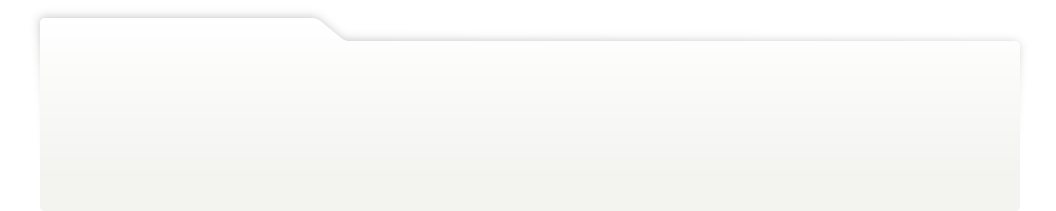
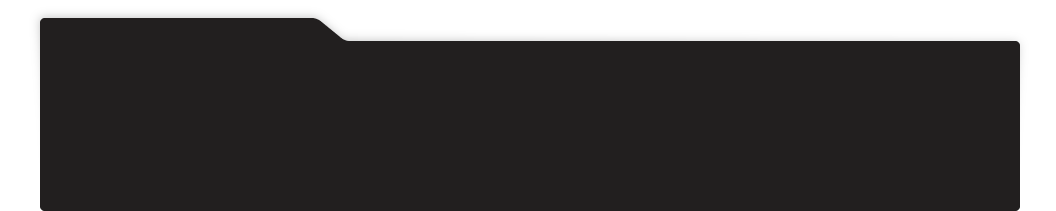
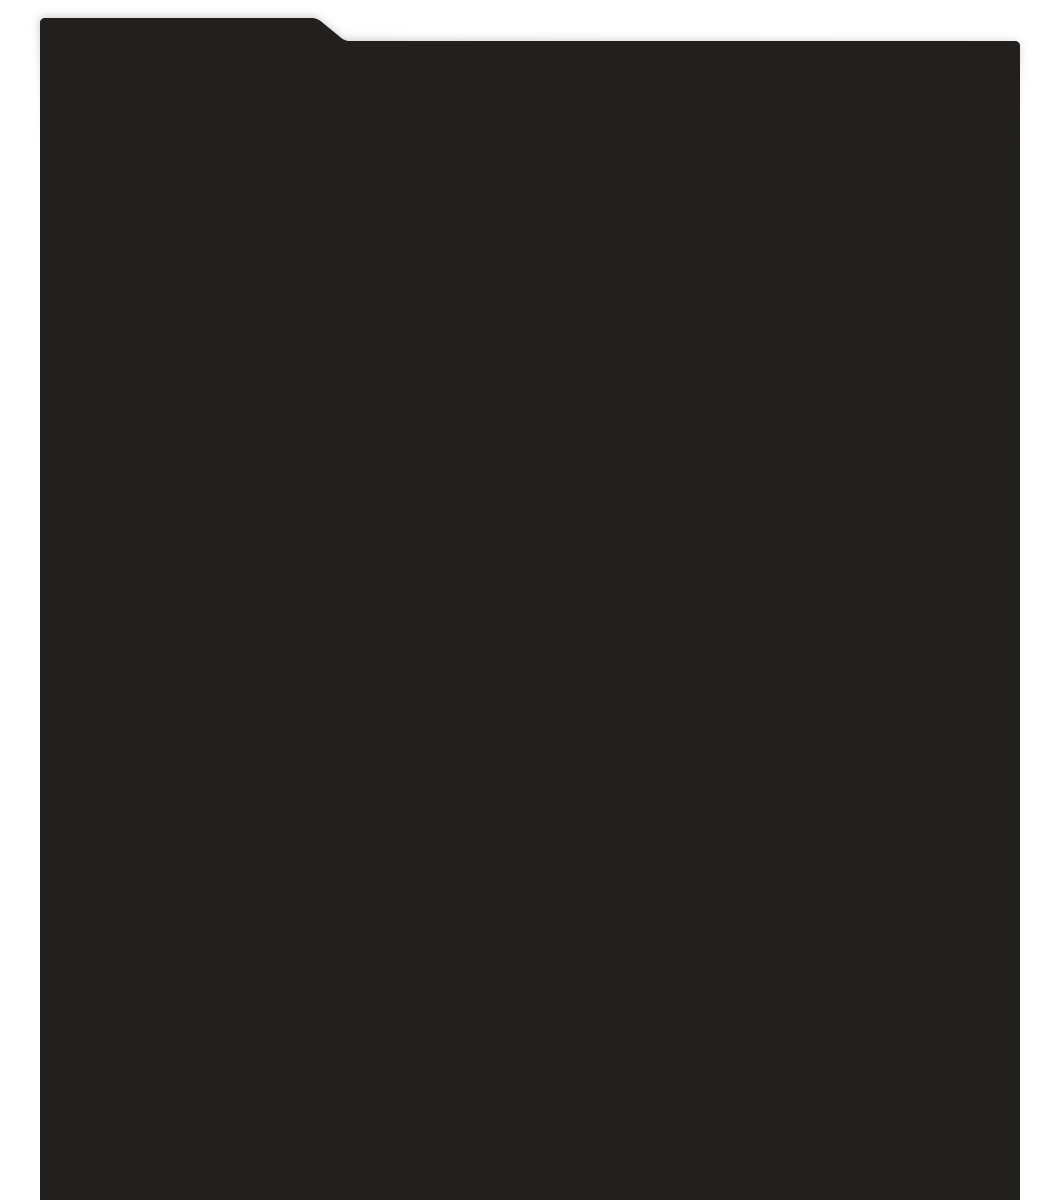
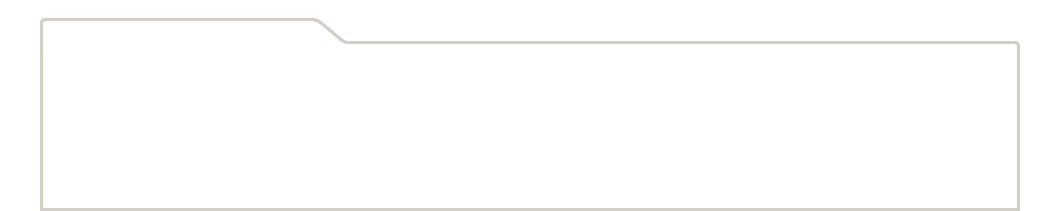
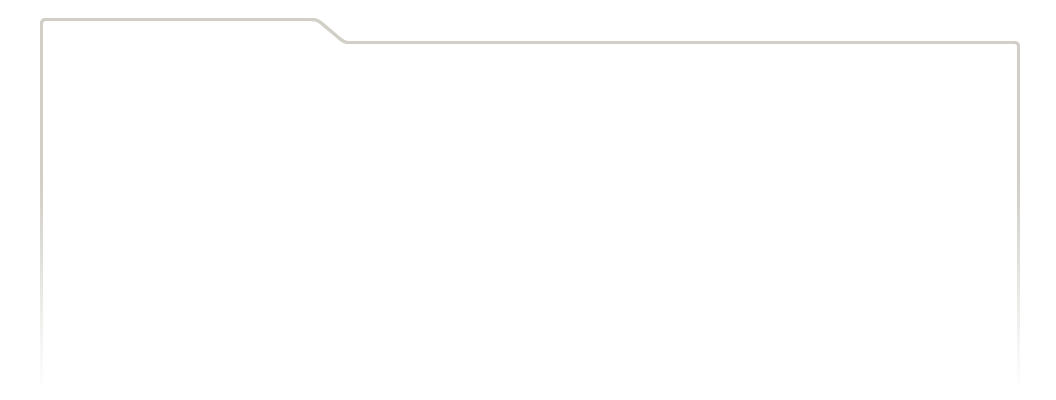
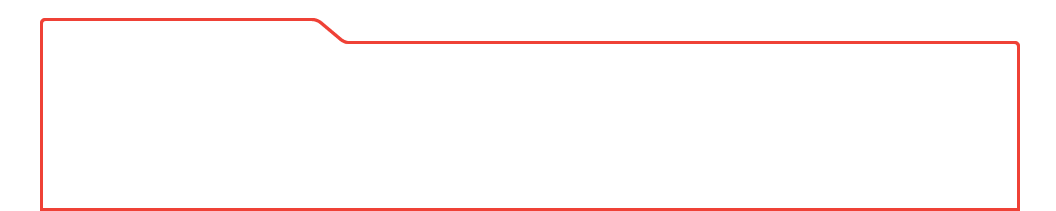
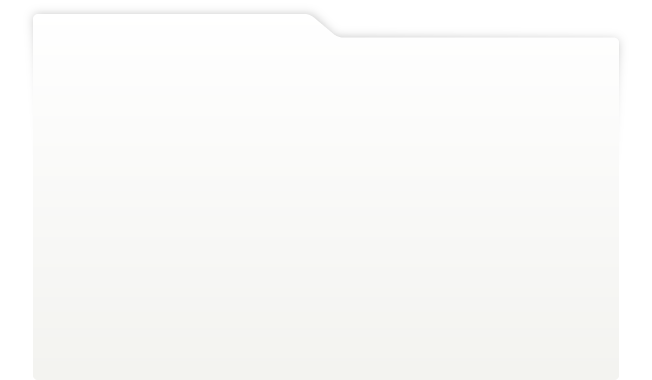
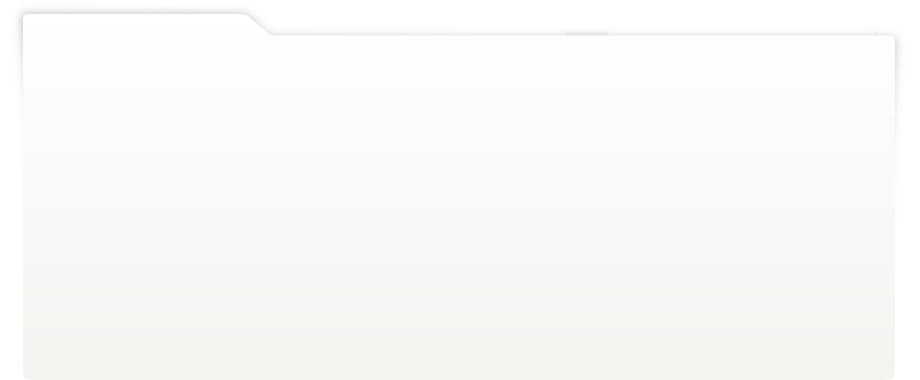
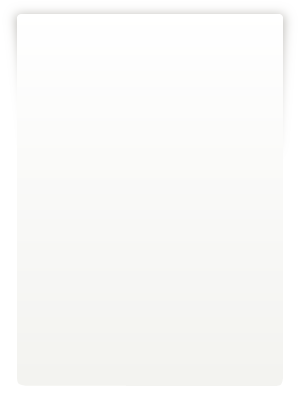
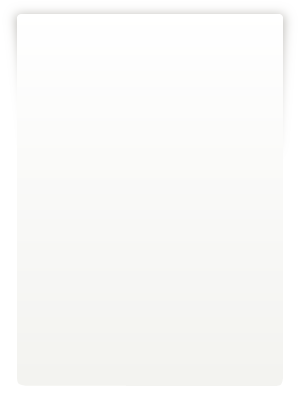
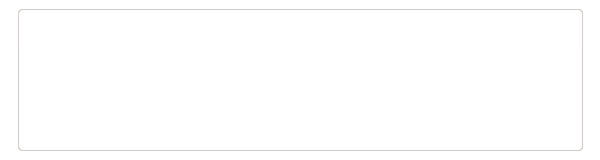
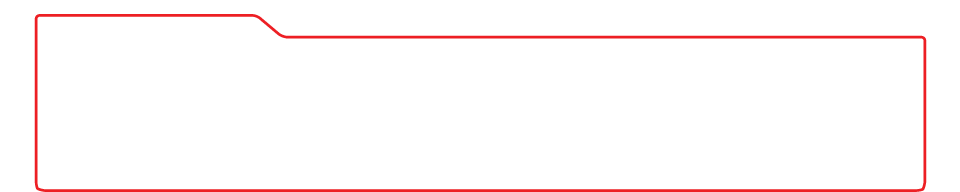
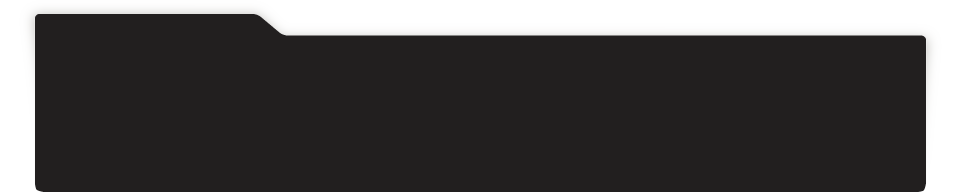
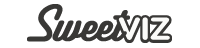
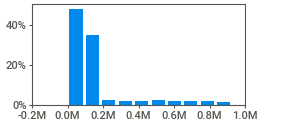
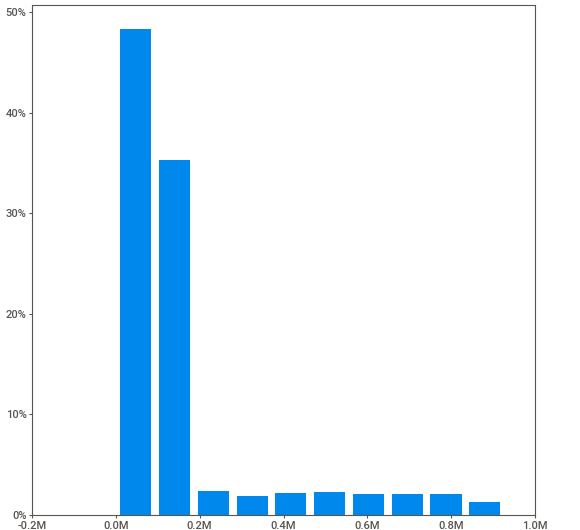
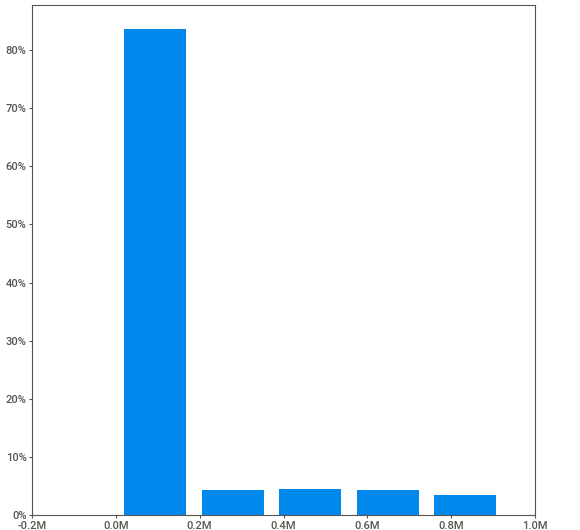
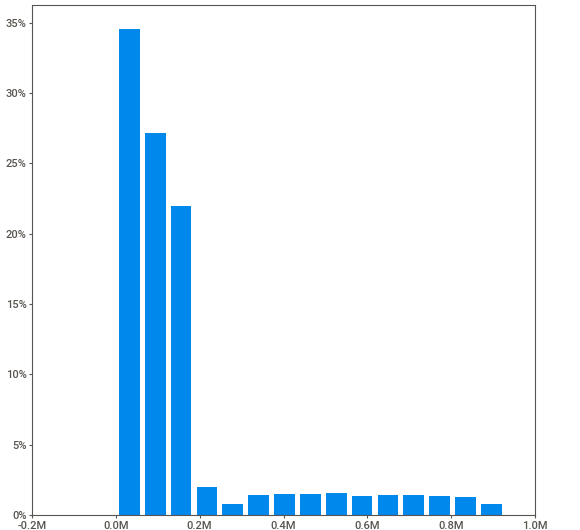
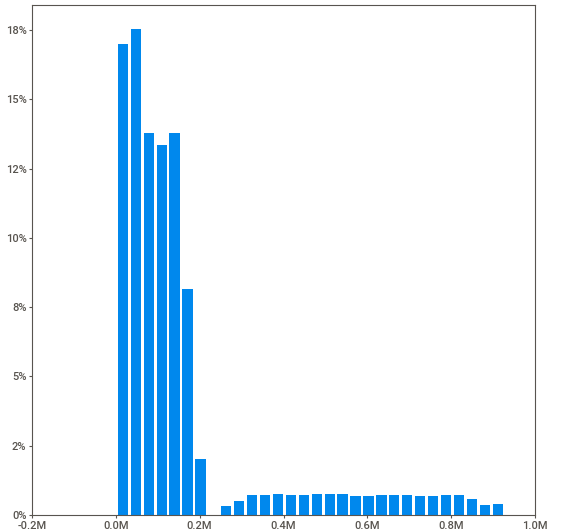
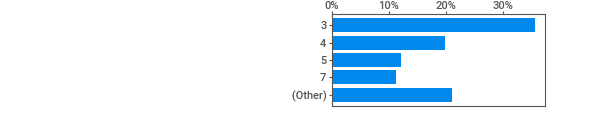
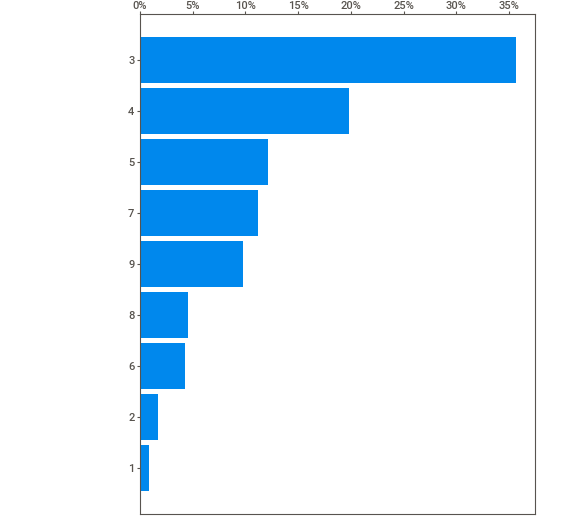
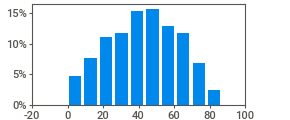
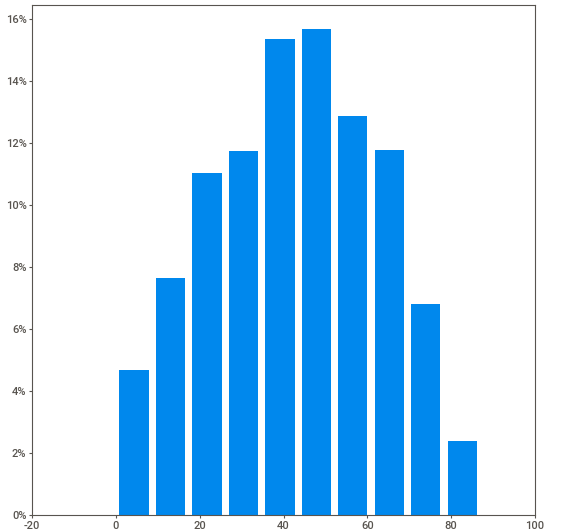
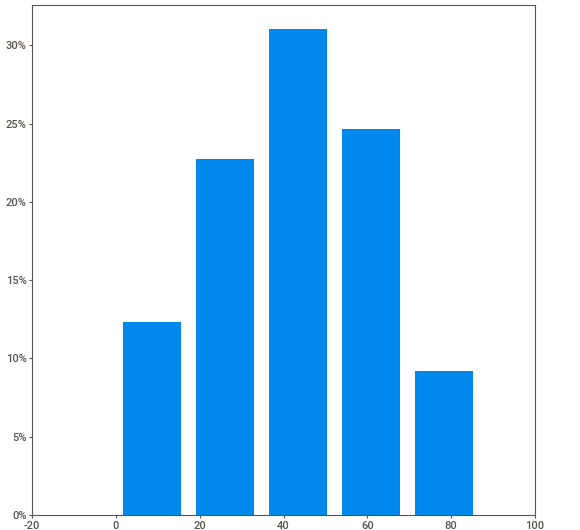
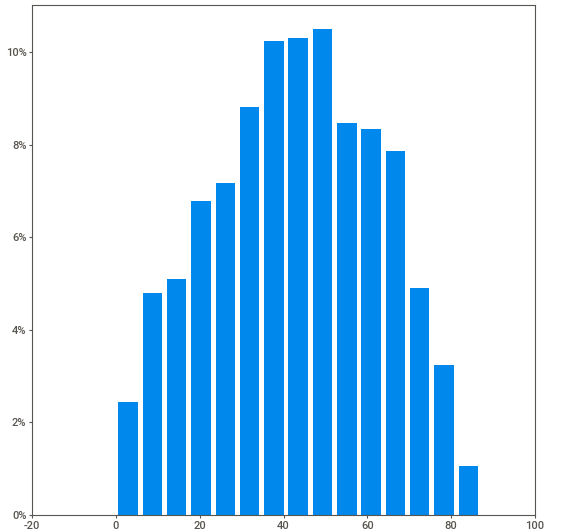
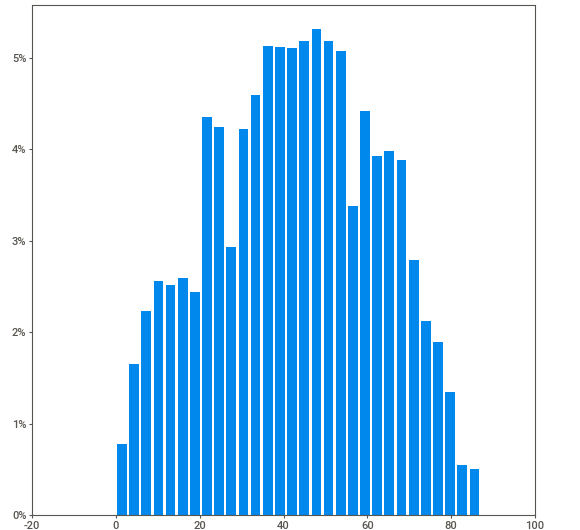
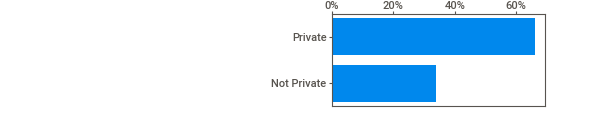
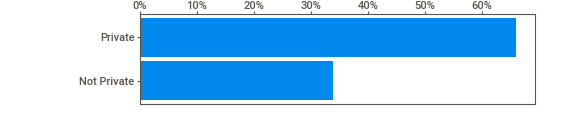
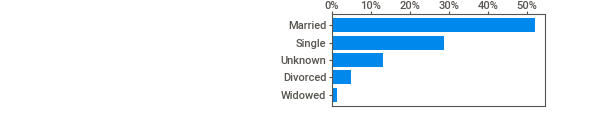
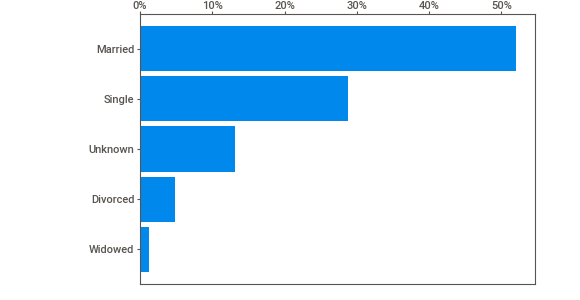
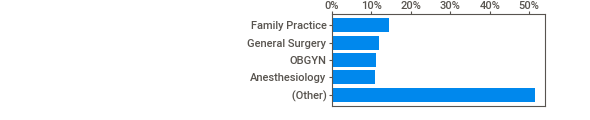
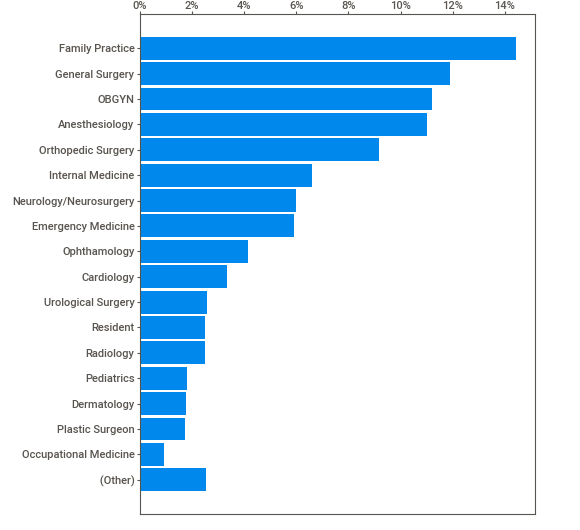
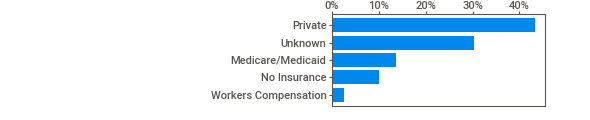
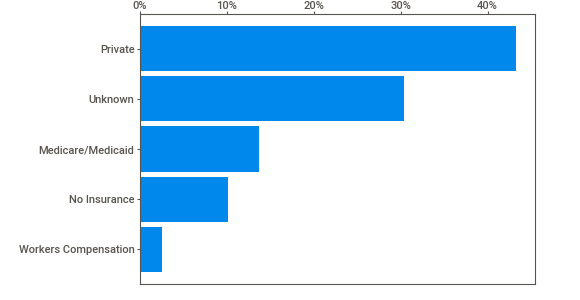
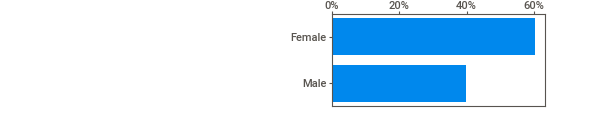
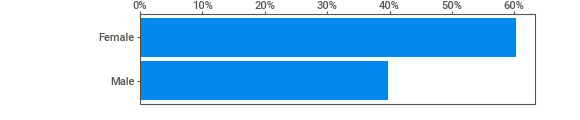
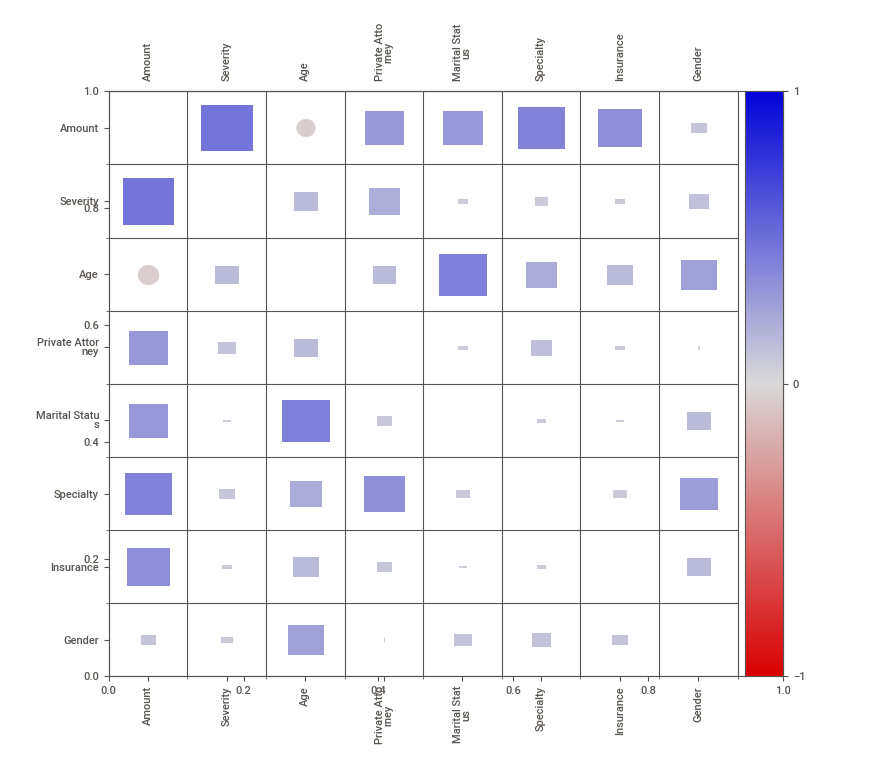
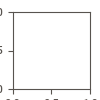

In [43]:
sv_report = sv.analyze(df)
sv_report.show_notebook()

In [9]:
df.describe(include = 'number').round(2)

,Amount,Severity,Age
count,79210.00,79210.00,79210.00
mean,157484.55,4.80,42.70
std,193135.09,2.08,19.81
min,1576.00,1.00,0.00
25%,43670.25,3.00,28.00
50%,98131.00,4.00,43.00
75%,154675.25,7.00,58.00
max,926411.00,9.00,87.00


In [10]:
df.describe(exclude = 'number').round(2)

,Private Attorney,Marital Status,Specialty,Insurance,Gender
count,79210,79210,79210,79210,79210
unique,2,5,20,5,2
top,Private,Married,Family Practice,Private,Female
freq,52349,41220,11436,34289,47770


## Amount

In [11]:
df['Amount'].describe().round(0)

count     79210.0
mean     157485.0
std      193135.0
min        1576.0
25%       43670.0
50%       98131.0
75%      154675.0
max      926411.0
Name: Amount, dtype: float64

<Axes: xlabel='Amount', ylabel='Count'>

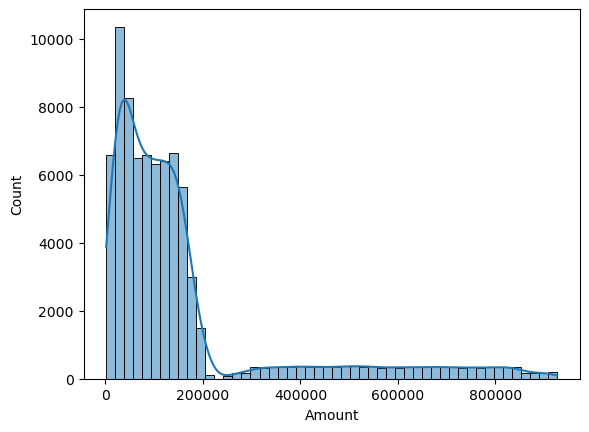

In [12]:
sns.histplot(df['Amount'], bins = 50, kde = True)

<Axes: ylabel='Amount'>

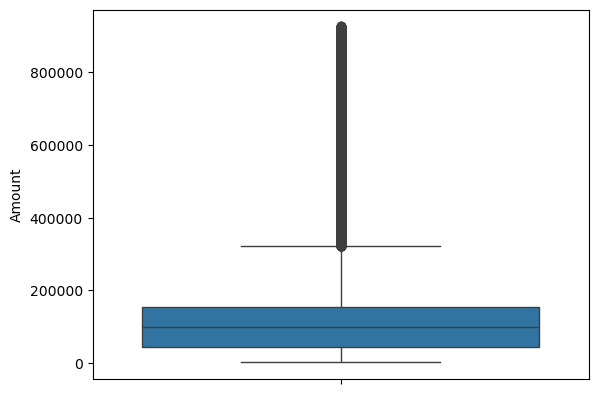

In [13]:
sns.boxplot(df['Amount'])

In [24]:
from sklearn.preprocessing import PowerTransformer
from sklearn import set_config

set_config(transform_output='pandas')

ptf = PowerTransformer(method = 'yeo-johnson')

results = ptf.fit_transform(df[['Amount']])
results

,Amount
0,-0.426505
1,1.191848
2,0.357273
3,2.132840
4,0.712910
...,...
79205,-1.128965
79206,-0.672459
79207,-0.842824
79208,0.478851


In [25]:
results.describe().round(2)

,Amount
count,79210.00
mean,-0.00
std,1.00
min,-3.30
25%,-0.66
50%,0.06
75%,0.48
max,2.25


<Axes: >

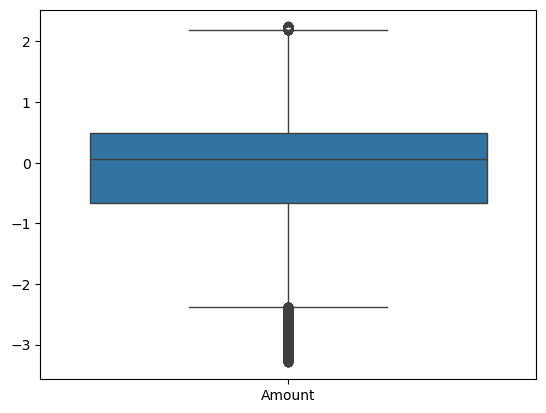

In [27]:
sns.boxplot(results)

### Results

---

Presence of outliers will complicate analysis - consider TransformedTargetRegressor with Box-Cox/Yeo-Johnson methods to handle outliers.

---

## Severity

In [30]:
df['Severity'].describe().round(0)

count    79210.0
mean         5.0
std          2.0
min          1.0
25%          3.0
50%          4.0
75%          7.0
max          9.0
Name: Severity, dtype: float64

<Axes: xlabel='Severity', ylabel='Count'>

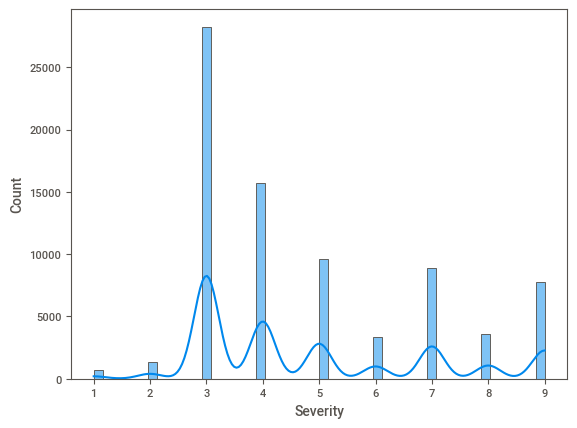

In [29]:
sns.histplot(df['Severity'], bins = 50, kde = True)

<Axes: ylabel='Severity'>

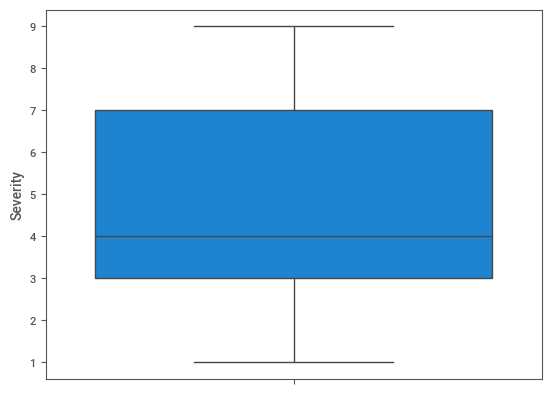

In [38]:
sns.boxplot(df['Severity'])

### Review

---

Histogram indicates feature should be treated as a categorical feature vs. continuous.

---

## Age

In [40]:
df['Age'].describe().round(0)

count    79210.0
mean        43.0
std         20.0
min          0.0
25%         28.0
50%         43.0
75%         58.0
max         87.0
Name: Age, dtype: float64

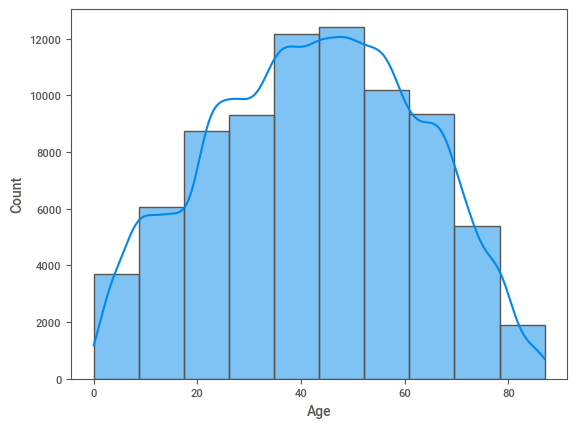

In [44]:
sns.histplot(df['Age'], bins = 10, kde = True);

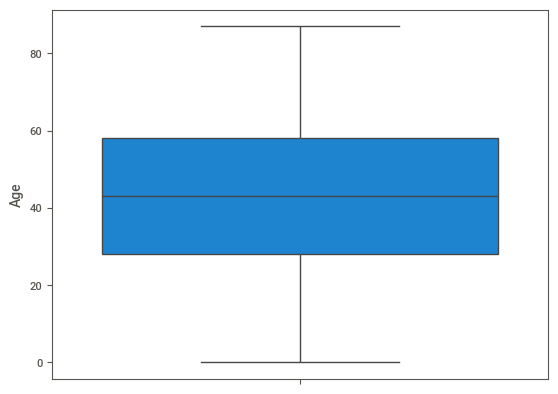

In [43]:
sns.boxplot(df['Age']);

### Review

---

Continuous feature, no outliers.

---

## Private Attorney

In [28]:
df['Private Attorney'].describe().round(0)

count       79210
unique          2
top       Private
freq        52349
Name: Private Attorney, dtype: object

In [34]:
df['Private Attorney'].value_counts(normalize = True, ascending = False).round(2)

Private Attorney
Private        0.66
Not Private    0.34
Name: proportion, dtype: float64

### Review

---

Categorical feature; imbalanced classes would impact classification modeling. Otherwise address with one-hot encoding.

---

## Marital Status

In [35]:
df['Marital Status'].describe().round(0)

count       79210
unique          5
top       Married
freq        41220
Name: Marital Status, dtype: object

In [36]:
df['Marital Status'].value_counts(normalize = True, ascending = False).round(2)

Marital Status
Married     0.52
Single      0.29
Unknown     0.13
Divorced    0.05
Widowed     0.01
Name: proportion, dtype: float64

### Review

---

Categorical feature; imbalanced classes would impact classification modeling. Otherwise address with one-hot encoding.

---

## Specialty

In [37]:
df['Specialty'].describe().round(0)

count               79210
unique                 20
top       Family Practice
freq                11436
Name: Specialty, dtype: object

In [38]:
df['Specialty'].value_counts(normalize = True, ascending = False).round(2)

Specialty
Family Practice           0.14
General Surgery           0.12
OBGYN                     0.11
Anesthesiology            0.11
Orthopedic Surgery        0.09
Internal Medicine         0.07
Neurology/Neurosurgery    0.06
Emergency Medicine        0.06
Ophthamology              0.04
Cardiology                0.03
Urological Surgery        0.03
Resident                  0.03
Radiology                 0.02
Pediatrics                0.02
Dermatology               0.02
Plastic Surgeon           0.02
Occupational Medicine     0.01
Pathology                 0.01
Thoracic Surgery          0.01
Physical Medicine         0.01
Name: proportion, dtype: float64

### Review

---

Categorical feature; imbalanced classes would impact classification modeling. Otherwise address with one-hot encoding (specify max number of categories).

---

## Insurance

In [39]:
df['Insurance'].describe().round(0)

count       79210
unique          5
top       Private
freq        34289
Name: Insurance, dtype: object

In [40]:
df['Insurance'].value_counts(normalize = True, ascending = False).round(2)

Insurance
Private                 0.43
Unknown                 0.30
Medicare/Medicaid       0.14
No Insurance            0.10
Workers Compensation    0.03
Name: proportion, dtype: float64

### Review

---

Categorical feature; imbalanced classes would impact classification modeling. Otherwise address with one-hot encoding.

---

## Gender

In [41]:
df['Gender'].describe().round(0)

count      79210
unique         2
top       Female
freq       47770
Name: Gender, dtype: object

In [42]:
df['Gender'].value_counts(normalize = True, ascending = False).round(2)

Gender
Female    0.6
Male      0.4
Name: proportion, dtype: float64

### Review

---

Categorical feature; imbalanced classes would impact classification modeling. Otherwise address with one-hot encoding.

---